# Выбор локации для нефтяной скважины

Работаем в добывающей компании «ГлавРосГосНефть». Задача: решить, где бурить новую скважину.

Имеются пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Необходимо построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. И проанализировать возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Библиотеки и функции

In [1]:
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
def read_df_csv(names, sep=','):      
    '''принимает список имен датасетов, которые находятся в директории /datasets/ 
    и помещает их в переменные data_1,_2,_3 и т.д.'''
    for i, c in enumerate(names):       
        globals().update({'data_'+str(i+1): pd.read_csv('/datasets/'+c, sep=sep)}) 

In [3]:
def about_df(list_df):
    '''выводит информацию о всех датасетах из списка list_df'''
    for c, i in enumerate(list_df):
        display("**** DATA_"+str(c+1)+' ****')
        display(i.info())
        display(i.describe().round(2))
        display(f'Количество дубликатов: {i.duplicated().sum()}')
        display('Количество пропущенных значений:', i.isnull().sum())

## Загрузка и подготовка данных

### Загрузка и описание данных

In [4]:
# Загрузка и вывод датасетов на экран:
names = ['geo_data_0.csv', 'geo_data_1.csv', 'geo_data_2.csv']
read_df_csv(names)
display(data_1.head(3), data_2.head(3), data_3.head(3))

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910


In [5]:
# Вывод информации о датасетах:
dfs = [data_1, data_2, data_3]
about_df(dfs)

'**** DATA_1 ****'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.00,100000.00,100000.00,100000.00
mean,0.50,0.25,2.50,92.50
std,0.87,0.50,3.25,44.29
min,-1.41,-0.85,-12.09,0.00
25%,-0.07,-0.20,0.29,56.50
50%,0.50,0.25,2.52,91.85
75%,1.07,0.70,4.72,128.56
max,2.36,1.34,16.00,185.36


'Количество дубликатов: 0'

'Количество пропущенных значений:'

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

'**** DATA_2 ****'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.00,100000.00,100000.00,100000.00
mean,1.14,-4.80,2.49,68.83
std,8.97,5.12,1.70,45.94
min,-31.61,-26.36,-0.02,0.00
25%,-6.30,-8.27,1.00,26.95
50%,1.15,-4.81,2.01,57.09
75%,8.62,-1.33,4.00,107.81
max,29.42,18.73,5.02,137.95


'Количество дубликатов: 0'

'Количество пропущенных значений:'

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

'**** DATA_3 ****'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.00,100000.00,100000.00,100000.00
mean,0.00,-0.00,2.50,95.00
std,1.73,1.73,3.47,44.75
min,-8.76,-7.08,-11.97,0.00
25%,-1.16,-1.17,0.13,59.45
50%,0.01,-0.01,2.48,94.93
75%,1.16,1.16,4.86,130.60
max,7.24,7.84,16.74,190.03


'Количество дубликатов: 0'

'Количество пропущенных значений:'

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

**Вывод**
<br>Данные содержат информацию о геологоразведке трех регионов. Каждый регион включает в себя 100 тыс. скважин. Явных дубликатов и пропущенных значений нет. Имеются аномальные значения.
Далее посмотрим, сколько будет скважин с одинаковым `id` и с одинаковыми параметрами кроме `id`

### Предобработка данных

In [6]:
# Выведем на экран дубликаты по колонке id
[display(i[i.duplicated('id')]) for i in dfs]

,id,f0,f1,f2,product
7530,HZww2,1.061194,-0.373969,10.430210,158.828695
41724,bxg6G,-0.823752,0.546319,3.630479,93.007798
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205
63593,QcMuo,0.635635,-0.473422,0.862670,64.578675
66136,74z30,1.084962,-0.312358,6.990771,127.643327
69163,AGS9W,-0.933795,0.116194,-3.655896,19.230453
75715,Tdehs,0.112079,0.430296,3.218993,60.964018
90815,fiKDv,0.049883,0.841313,6.394613,137.346586
92341,TtcGQ,0.110711,1.022689,0.911381,101.318008
97785,bsk9y,0.378429,0.005837,0.160827,160.637302


,id,f0,f1,f2,product
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625
82178,bfPNe,-6.202799,-4.820045,2.995107,84.038886
82873,wt4Uk,10.259972,-9.376355,4.994297,134.766305
84461,5ltQ6,18.213839,2.191999,3.993869,107.813044


,id,f0,f1,f2,product
43233,xCHr8,-0.847066,2.101796,5.597130,184.388641
49564,VF7Jo,-0.883115,0.560537,0.723601,136.233420
55967,KUPhW,1.211150,3.176408,5.543540,132.831802
95090,Vcm5J,2.587702,1.986875,2.482245,92.327572


[None, None, None]

Поскольку дубликатов мало: 10, 4 и 4 дубля на 100 тыс.наблюдений, то их можно удалить

In [7]:
for i in dfs:
    i.drop_duplicates(subset=['id'], inplace=True)

In [8]:
# Посмотрим, сколько есть дубликатов по первым двум столбцам:
[display(i[i.duplicated(['f0', 'f1'], keep=False)]) for i in dfs]

,id,f0,f1,f2,product


,id,f0,f1,f2,product


,id,f0,f1,f2,product


[None, None, None]

Повторяющихся строк с идентичными параметрами f0 и f1 нет, поэтому в датасетах также нет строк с полностью повторящимися входоными параметрами для моделирования.

Создадим списки с `id` скважин с максимальными и минимальными значениями по каждому признаку в каждом датасете.

In [9]:
anomaly_list = [[], [], []]
for i, n in enumerate(dfs):
    for j in ['f0', 'f1', 'f2', 'product']:                            
        temp = n[n[j] == n[j].min()]['id'].to_list()
        anomaly_list[i].extend(temp)
        temp = n[n[j] == n[j].max()]['id'].to_list()
        anomaly_list[i].extend(temp)

In [10]:
anomaly_list

[['oo1fC', '3lwQd', 'uRfPx', 'KqnUi', 'Ri3EF', 'QFDWZ', 'zCM5W', 'rjMou'],
 ['jJm67',
  'X3QK2',
  'vkz7N',
  'A0TZE',
  '8OlS8',
  'E7IZn',
  'OXyvW',
  'igmai',
  'Qjy5w',
  'G6WCj',
  'MzQhL',
  'gdvra',
  'VHp5v',
  'dm9rM',
  '6az0U',
  'iDXiz',
  'y64Of',
  'IyegP',
  'iBxns',
  'M1H78',
  '0FwBG',
  'iidzz',
  'GbM5c',
  '68I1D',
  'CcaiZ',
  'WanNS',
  'DDpSa',
  'ymiWh',
  'HFpHJ',
  'SsbG8',
  'qKsbw',
  'DqUNv',
  'N5Ltf',
  '47FMq',
  'YlJpm',
  'cZQPz',
  'TftoL',
  'pxZda',
  'D0Fed',
  'U0NMZ',
  'hCaTb',
  'd1EP7',
  'Cc8wd',
  'WEjgX',
  'BxxkB',
  'VJje1',
  'cUvqE',
  'nVu0a',
  'hdpOb',
  'dVrLQ',
  'rGlog',
  'AjvbE',
  'eGC8B',
  'xIaFn',
  'kNIg9',
  'YzahX',
  'OzLzx',
  'EbvFJ',
  '6h5mD',
  '5tVwu',
  'AVHpd',
  'maJKK',
  'kLSFJ',
  'jTAgZ',
  'JFk2g',
  'yCT8O',
  'TUvJ9',
  'WxNy5',
  'kpMhR',
  'nnRqo',
  'opgK9',
  'lgymO',
  'RZyKR',
  '2tgOV',
  'oqdF3',
  'M2UwV',
  'h4IfY',
  '2nlhb',
  'EBxqH',
  'fmnNQ',
  'kCaWa',
  'RjcEL',
  '8dfTC',
  'iCgg9',
 

Видно, что во втором датасете слишком много максимальных/минимальных значений. Посмотрим повнимательнее

In [11]:
len(anomaly_list[1])

16474

In [12]:
data_2.describe()

,f0,f1,f2,product
count,99996.000000,99996.000000,99996.000000,99996.000000
mean,1.141209,-4.796608,2.494501,68.823916
std,8.965815,5.119906,1.703579,45.944663
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011475,57.085625
75%,8.620964,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [13]:
data_2.query('product > 137.9454')

,id,f0,f1,f2,product
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408
32,2DKVI,10.209863,-13.659814,5.000668,137.945408
51,5IdNU,-16.330562,-3.434733,5.005144,137.945408
55,hsHjt,-10.723470,-1.382114,5.001028,137.945408
...,...,...,...,...,...
99952,qwCXl,-6.064339,-7.083590,5.005621,137.945408
99957,YSDUl,-10.640069,-10.947818,5.000129,137.945408
99993,FOKH6,-8.421251,-2.813906,4.997337,137.945408
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408


In [14]:
data_2.query('product == 0.0')

,id,f0,f1,f2,product
11,OXyvW,16.320755,-0.562946,-0.001783,0.0
13,igmai,6.695604,-0.749449,-0.007630,0.0
62,Qjy5w,21.418478,-5.134490,-0.002836,0.0
63,G6WCj,6.822701,3.104979,-0.000723,0.0
77,MzQhL,6.750150,-11.893512,-0.001601,0.0
...,...,...,...,...,...
99936,YrRU8,5.085749,-3.980305,0.005063,0.0
99948,Jbnur,8.277805,-9.178818,0.003275,0.0
99956,aV1cJ,13.343983,-1.290200,0.005980,0.0
99961,Zjbn2,13.854163,-11.528089,-0.005556,0.0


Оказалось, что во втором датасете 8233 значения с максимальной продуктивностью = 137.945408 и 8235 с минимальной продуктивностью = 0. Поскольку таких данных слишком много, то удалить их мы не можем. Тогда добавим в список аномалий из data_2 только id с аномальными параметрами `f0, f1, f2`

In [15]:
anomaly_list[1] = []
for j in ['f0', 'f1', 'f2']:                            
    temp = data_2[data_2[j] == data_2[j].min()]['id'].to_list()
    anomaly_list[1].extend(temp)
    temp = data_2[data_2[j] == data_2[j].max()]['id'].to_list()
    anomaly_list[1].extend(temp)

In [16]:
anomaly_list

[['oo1fC', '3lwQd', 'uRfPx', 'KqnUi', 'Ri3EF', 'QFDWZ', 'zCM5W', 'rjMou'],
 ['jJm67', 'X3QK2', 'vkz7N', 'A0TZE', '8OlS8', 'E7IZn'],
 ['onzVI', 'pCvjX', 'W9XXe', 'KuaAc', 'axf5F', '4KBhu', 'qeefd', 'UAhji']]

In [17]:
# Удалим строки с аномальными значениями из датасетов:
for i in anomaly_list[0]:
    data_1 = data_1[data_1['id'] != i]
for i in anomaly_list[1]:
    data_2 = data_2[data_2['id'] != i]
for i in anomaly_list[2]:
    data_3 = data_3[data_3['id'] != i]

len(data_1), len(data_2), len(data_3)

(99982, 99990, 99988)

**Вывод**
<br>Дублирующиеся значения по id найдены и удалены. Строки с аномально высокими / низкими значениями также удалены.

### Исследовательский анализ данных

Посмотрим на распределения признаков во всех 3 датасетах

Распределение признаков в регионе № 1:


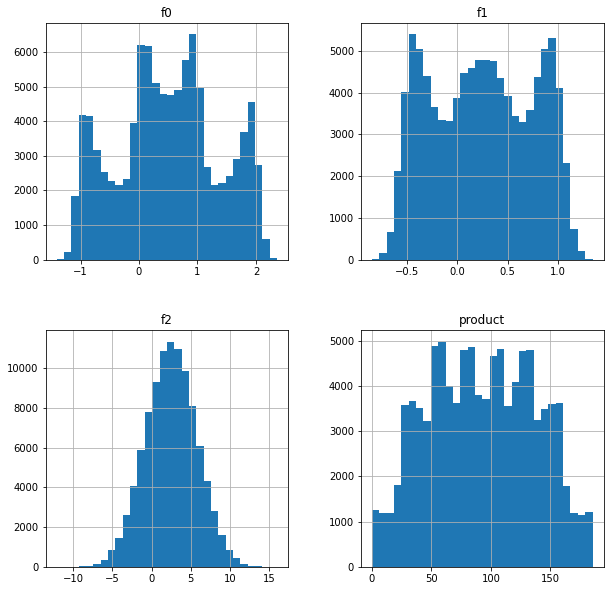

Распределение признаков в регионе № 2:


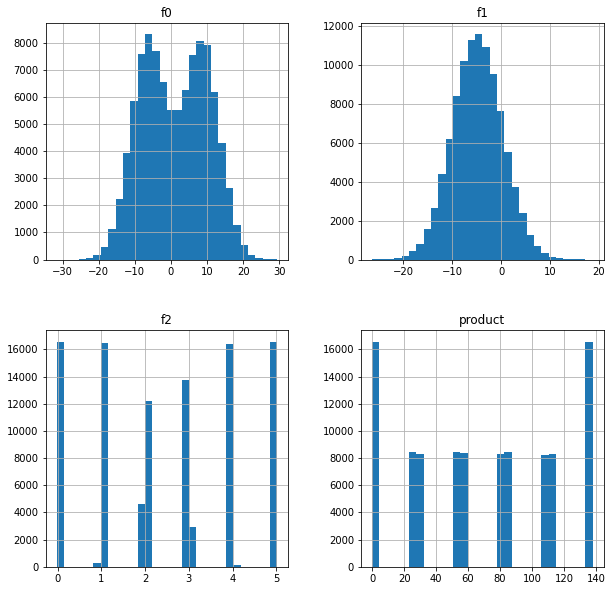

Распределение признаков в регионе № 3:


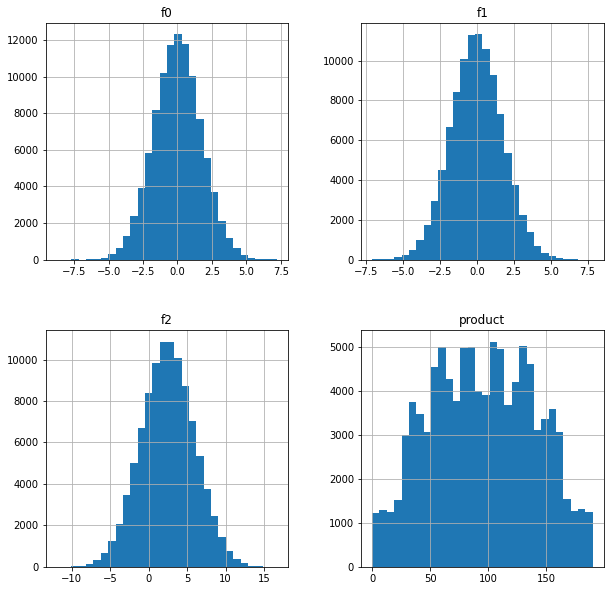

In [18]:
for i, df in enumerate(dfs):
    print(f'Распределение признаков в регионе № {i+1}:')
    df.hist(bins=30, figsize=(10, 10))
    plt.show()

Как видно из построенных гистрамм, распределения по всем 3 регионам отличаются. Распределения значений f2 и product во втором датасете имеют более дискретный характер.

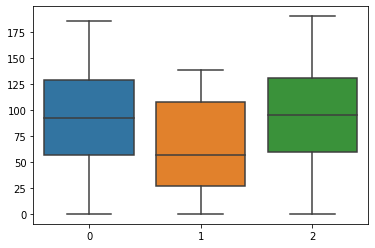

In [19]:
sns.boxplot(data=[data_1['product'], data_2['product'], data_3['product']]);

**Вывод**
<br>Как видно из проведенного анализа, распределения по всем 3 регионам отличаются. Распределения значений f2 и product во втором датасете имеют более дискретный характер. В третьем датасете f0, f1, f2 имеют нормальное распределение.
<br>Построеные боксплоты говорят о том, что наименьший разброс значений имеет второй датасет. При этом в нем больше разброс в большей половине значений продуктивности.

## Обучение и проверка модели

Инициируем линейную модель (по условию) для обучения всех 3х датасетов, разобъем данные на выборки, обучим модель на train, сделаем расчет продуктивности для валидационных данных для каждой скважины и выведем на экран среденее значение и RMSE для каждого региона. Заодно дабавим расчеты продуктивности по модели в датасеты: val_data_1,_2,_3.
<br>Масштабирование проводить не будем, поскольку признаки близки др. к другу по значениям.

In [20]:
# Модель, 2 константы и список с нужными датасетами:
model = LinearRegression()
RANDOM_STATE = 1
TEST_SIZE = 0.25
dfs = [data_1, data_2, data_3]

In [21]:
for i, df in enumerate(dfs):
    print(f'Регион №{i+1}:')
    X_train, X_val, y_train, y_val = train_test_split(
        df.drop(['id', 'product'], axis=1),
        df['product'],
        test_size = TEST_SIZE, 
        random_state = RANDOM_STATE)
    print(f'train size: {X_train.shape};  val size: {X_val.shape}')   
    model.fit(X_train, y_train)
    predictions_lr = model.predict(X_val)
    X_val['product'] = y_val
    X_val['model_product'] = predictions_lr
    globals()['val_data_'+str(i+1)] = X_val
    print(f'Среденее значение по модели: {predictions_lr.mean().round(3)}; \
 RMSE: {mean_squared_error(y_val, predictions_lr, squared=False).round(3)}')
    print()

Регион №1:
train size: (74986, 3);  val size: (24996, 3)
Среденее значение по модели: 92.683;  RMSE: 37.745

Регион №2:
train size: (74992, 3);  val size: (24998, 3)
Среденее значение по модели: 68.915;  RMSE: 0.888

Регион №3:
train size: (74991, 3);  val size: (24997, 3)
Среденее значение по модели: 95.006;  RMSE: 39.781



In [22]:
val_data_2.head(3)

,f0,f1,f2,product,model_product
31047,11.996961,-0.662203,3.993605,107.813044,107.563499
3920,-5.140367,-5.003588,4.999103,137.945408,137.244139
37571,-11.496365,-16.056940,2.002668,57.085625,57.639117


In [23]:
# Размеры валидационных датасетов с расчетами продуктивности (для проверки). Должны быть 24996, 24998 и 24997 
len(val_data_1), len(val_data_2), len(val_data_3)

(24996, 24998, 24997)

**Вывод**
<br>В результате применения линейной модели нименьшее значение ошибки получилось у второго региона. Это связано с меньшим разбросом данных, чем в прочих датасетах и наличием групп с почти одинаковой продуктивностью. При этом первый и третий регионы  имеют больший запас нефти.

## Подготовка к расчёту прибыли

In [24]:
# необходимые константы
FIELD_COST = 10**7   # Стоимость разработки всего месторождения (в тыс. руб) 
INCOME = 450         # Доход с ед. добываемой продукции скважины (в тыс. руб):
WELLS = 200          # Количество лучших скважин
DOTS = 500           # Количество скважин, исследуемых при разведке региона 

In [25]:
FIELD_COST/WELLS/INCOME

111.11111111111111

In [26]:
data_1['product'].mean(), data_2['product'].mean(), data_3['product'].mean()

(92.49971263256032, 68.82444610900323, 94.99809935903019)

Для возврата кап. вложений в 200 скважин региона (при затратах на них 10 млрд. руб, т.е. по 50 млн. на скв.) необходимо, чтобы в среднем каждая из 200 скважин дала 111,1 тыс. баррелей.
Расчет средних значений продуктивности по всем сважинам регионов показывает, что большая часть скважин не рентабельная при условии траты по 50 млн. руб на скв.

Посмотрим, какой из регионов наиболее перспективен

In [27]:
# Датасеты с расчетами продуктивности, найденой ранее
dfs = [val_data_1, val_data_2, val_data_3]

Напишишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели

In [28]:
val_data_1

,f0,f1,f2,product,model_product
44614,0.017192,0.389803,6.787717,175.160472,117.038477
51826,-0.422079,1.109285,-4.229504,88.260253,32.576056
43475,-0.950481,0.721564,3.811347,59.526354,89.135803
31034,-1.048086,0.361026,-0.092342,89.549785,68.128794
96742,1.086476,-0.443342,1.665869,87.663685,98.999804
...,...,...,...,...,...
71355,-0.861136,-0.001976,-1.354231,19.361447,65.632599
2313,1.901519,0.118243,0.488106,103.578452,86.304648
74319,1.700010,-0.101459,1.748018,144.940426,96.975958
74010,-0.930385,0.450634,1.970697,49.671282,80.902920


In [29]:
def find_revenue(df, wells):
    
    '''
    Функция для расчета прибыли от добычи нефти (млрд.руб):
    df - датасет со скважинами,
    wells - количество лучших скважин для расчета
    '''
    
    best_wells = df.sort_values(by='model_product', ascending=False).head(wells)
    rev = (best_wells['product'].sum() * INCOME / 10**6).round(3)

    return rev - wells * .05

In [30]:
for i, n in enumerate(dfs):
    print(f"Лучшие скважины в регионе №{i+1} (по модели):", 
          f"Прибыль от реализации {WELLS} лучших скважин: {find_revenue(n, WELLS).round(3)} млрд.руб \
(при стоимости 1 скв - 50 млн. руб)", sep='\n')
    
    print()

Лучшие скважины в регионе №1 (по модели):
Прибыль от реализации 200 лучших скважин: 3.376 млрд.руб (при стоимости 1 скв - 50 млн. руб)

Лучшие скважины в регионе №2 (по модели):
Прибыль от реализации 200 лучших скважин: 2.415 млрд.руб (при стоимости 1 скв - 50 млн. руб)

Лучшие скважины в регионе №3 (по модели):
Прибыль от реализации 200 лучших скважин: 2.51 млрд.руб (при стоимости 1 скв - 50 млн. руб)



**Вывод**
<br>Для возврата кап. вложений в 200 скважин региона (при затратах на них 10 млрд. руб, т.е. по 50 млн. на скв.) необходимо, чтобы в среднем каждая из 200 скважин дала 111,1 тыс. баррелей.
<br>Расчет средних значений продуктивности по всем сважинам регионов показывает, что большая часть скважин не рентабельная при условии траты по 50 млн. руб на скв.
<br>Согласно модели наиболее выгодный регион для бурения 200 лучших скважин это регион №1. При этом определение точности запасов выше для второго региона.

## Расчёт прибыли и рисков методом bootstrap

In [31]:
state = np.random.RandomState(12345)

In [32]:
print(f'Значения при разработке {WELLS} лучших среди {DOTS} случайных скважин региона', '', sep='\n')

for i, df in enumerate(dfs):
    print(f'Регион №{i+1}:')
    values = []
    for i in range(1000):
        target_subsample = df.sample(n=DOTS, replace=True, random_state=state)
        values.append(find_revenue(target_subsample, WELLS))

    values = pd.Series(values)
    lower = values.quantile(.025).round(3)
    upper = values.quantile(.975).round(3)
    risk = (values < 0).mean()*100   # risk = values[values < 0].count() / 10

    mean = values.mean().round(3)
    print(f'Средняя прибыль: {mean} млрд.руб', 
          f'Доверительный интервал (95%): {lower} - {upper}', 
          f'Вероятность убытка: {risk}%', sep='\n')   
    print()

Значения при разработке 200 лучших среди 500 случайных скважин региона

Регион №1:
Средняя прибыль: 0.456 млрд.руб
Доверительный интервал (95%): -0.117 - 0.989
Вероятность убытка: 5.4%

Регион №2:
Средняя прибыль: 0.457 млрд.руб
Доверительный интервал (95%): 0.075 - 0.84
Вероятность убытка: 0.7000000000000001%

Регион №3:
Средняя прибыль: 0.365 млрд.руб
Доверительный интервал (95%): -0.177 - 0.918
Вероятность убытка: 9.4%



**Вывод**
<br>Наиболее прибыльным регионом при бурении 200 лучших среди 500 случайных скважин региона является второй регион. Пр этом у данного региона наибольшая вероятность получить убыток.

## Вывод

1. Данные содержат информацию о геологоразведке трех регионов. Каждый регион включает в себя 100 тыс. скважин. Явных дубликатов и пропущенных значений нет. Имеются аномальные значения. Далее посмотрим, сколько будет скважин с одинаковым id и с одинаковыми параметрами кроме id.
2. Дублирующиеся значения по id найдены и удалены. Строки с аномально высокими / низкими значениями также удалены.
3. Как видно из проведенного анализа, распределения по всем 3 регионам отличаются. Распределения значений f2 и product во втором датасете имеют более дискретный характер. В третьем датасете f0, f1, f2 имеют нормальное распределение. Построеные боксплоты говорят о том, что наименьший разброс значений имеет второй датасет. При этом в нем больше разброс в большей половине значений продуктивности.
4. В результате применения линейной модели нименьшее значение ошибки получилось у второго региона. Это связано с меньшим разбросом данных, чем в прочих датасетах и наличием групп с почти одинаковой продуктивностью. При этом первый и третий регионы имеют больший запас нефти.
5. Для возврата кап. вложений в 200 скважин региона (при затратах на них 10 млрд. руб, т.е. по 50 млн. на скв.) необходимо, чтобы в среднем каждая из 200 скважин дала 111,1 тыс. баррелей. Расчет средних значений продуктивности по всем сважинам регионов показывает, что большая часть скважин не рентабельная при условии траты по 50 млн. руб на скв. Согласно модели наиболее выгодный регион для бурения 200 лучших скважин это регион №1. При этом определение точности запасов выше для второго региона.
6. Наиболее прибыльным регионом при бурении 200 лучших среди 500 случайных скважин региона является второй регион. Пр этом у данного региона наибольший разброс значений прибыли и наибольшая вероятность получить убыток.
**Рекомендация**
<br>Для разработки рекомендуется Регион №2 как обладающий наименьшей вероятностью получения убытка (по сравнению с регионами №1, 3) и при этом обладающий большими запасами по сравнению с этими регионами. Также это единственный регион с полностью положительным 95% доверительным интервалом. 